# Integral Definida

 <img src='IntegralDefinida.png' />

## Área Abaixo da Curva

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x=np.linspace(0,10,21)
y=x**2-5*x+6

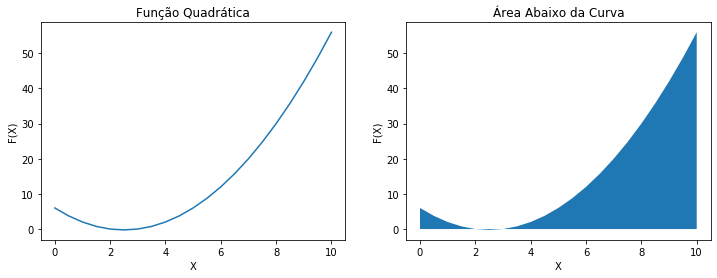

In [7]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))

axes[0].plot(x, y)
axes[0].set_xlabel('X')
axes[0].set_ylabel('F(X)')
axes[0].set_title("Função Quadrática")

axes[1].fill_between(x,y)
axes[1].set_xlabel('X')
axes[1].set_ylabel('F(X)')
axes[1].set_title("Área Abaixo da Curva")

plt.show()

# Ordem de aproximação
## Regras de Newton-Cotes

As regras abaixo são conhecidas como Fórmulas de Newton-Cotes, há dois tipos delas as abertas e as fechadas. A regra do ponto médio é uma fórmula de Newton-Cotes aberta. A regra trapezoidal e de Simpson são exemplos de uma categoria de métodos conhecida como fórmulas de Newton-Cotes fechada. A fórmula de Newton-Cotes é chamada fechada quando o conjunto de seus pontos incluem os extremos do intervalo de integração.

 <img src='Newton-Cotes.png'>

 <img src='Newton-Cotes1.png'>

 

### Exemplo: Método Trapezoidal

In [8]:
def y(x):                #Função a ser integrada
    return x**2-5*x+6

N = 1000                    #número de pontos
a=0.0                     #ponto inicial
b=10.0                    #ponto final 
h=(b-a)/N                 #intervalo infinitesimal  

constante = 0.5*(y(a)+y(b))
soma=0
for k in range(1,N):
    soma +=y(a+k*h)

I = h*(constante+soma)

print (I)

143.33350000000002


### Tarefa 1 - Implementar usando o método np.trapz()

In [9]:
x=np.linspace(0,10,1000)
y=y(x)
np.trapz(y,x)

143.333500333834

### Tarefa 2 - Queda Livre
Um corpo é abandonado de certa altura e atinge o solo após um determinado tempo. Utilize o arquivo "Queda_livre.csv", que apresenta a aceleração resultante do corpo em função do tempo de queda, e calcule o valor final da velocidade atingida pelo corpo.

#### Calcule o valor final da velocidade atingida pelo corpo.

In [1]:
import csv

import numpy as np
import matplotlib.pyplot as plt

# tempo, aceleracao

Data = []

with open('Queda-livre.csv','r') as entrada:
    ler = csv.reader(entrada)
    next(ler)

    for linha in ler:
        for i in range(len(linha)):
            linha[i] = float(linha[i])
        Data.append(linha)



tempo = []
aceleracao = []

for i in Data:

    t, a = i
    tempo.append(t)
    aceleracao.append(a)

N = len(tempo)
a = tempo[0]
b = tempo[N-1]
h = (b-a)/N


velocidade = np.empty(N)
velocidade[0] = 0

for k in range(1,N):
    velocidade[k] = velocidade[k-1]+(aceleracao[k-1]+aceleracao[k])*(h/2)

print(velocidade[k])

FileNotFoundError: [Errno 2] No such file or directory: 'Queda-livre.csv'

### Tarefa 3 - Distância percorrida

Escrever um programa em Python que lê o arquivo **velocities.txt**, e usando a regra trapezoidal, calcula a distância percorrida pela partícula no eixo x como função do tempo e plote, no mesmo gráfico da velocidade em função do tempo, a distância percorrida. Mais informações: http://www-personal.umich.edu/~mejn/computational-physics/

Conjunto de dados que contém duas colunas numéricas, onde na primeira está o tempo, em segundos, e na segunda a velocidade no eixo x, em metros por segundos, de uma partícula.

 <img src='Figure-1.png' /></a>

In [0]:
import numpy as np

tempo,velocidade = np.loadtxt('velocities.txt',unpack=True)

distancia_total = 0
distancia = []
for item in velocidade:
    distancia_total = distancia_total + item
    distancia.append(distancia_total)

plt.plot(tempo, distancia, 'b', label="distancia")
plt.plot(tempo, velocidade, 'r', label="velocidade")
plt.xlabel('tempo (s)')
plt.legend()
plt.show()

### Usando o Numpy - Regra Trapezoidal




In [0]:
import numpy as np

tempo,velocidade = np.loadtxt('velocities.txt',unpack=True)

N = len(tempo)
a = tempo[0]
b = tempo[N-1]
h = (b-a)/N

#USANDO NUMPY
distancia2=np.trapz(velocidade,dx=h)
print(distancia2)

### Usando o Scipy - Regra de Simpson

In [0]:
from scipy import integrate
import numpy as np

x = np.linspace(0,10,11)
y=x**2-5*x+6

N = 10
a = tempo[0]
b = 10
h = (b-a)/N

I2 = integrate.simps(y,dx=h) 

print(I2)

### Usando o Scipy - INTEGRAL DUPLA